##TD3 - Traitement Statistique des Données

DO AMARAL CORREA Rafael<br>
SHOITI TSURUKAWA Luiz Augusto

Dans ce TP nous allons faire un jeu de dés avec les scores de 40 athlètes qui ont participé à 2 compétitions : JO et Decastar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## On charge les données

In [ ]:
X = pd.read_excel("decathlon.xlsx",sheet_name=0,header=0,index_col=0)
X = X.dropna() # Remove line without a piece of data 

X["Competition"] = X["Competition"].astype("category") # Category variable

n = X.shape[0] # Nombre d'observations 
p = X.shape[1] # Nombre de variables

n

39

Notez que dans la base de données originale nous avons 40 athlètes, mais comme l'un d'entre eux manquait de données, il a été exclu de l'analyse, donc maintenant nous allons travailler avec seulement les 39 restants.

## Moyenne et écart type

In [ ]:
X_scores = X.select_dtypes(exclude="category").drop(columns="Classement").drop(columns="Points")
dic_moy_eca = {} # Creation d'un dictionnaire
for i in X_scores.columns:
    moyenne = X_scores[i].mean() # Calcule la moyenne de chaque variable
    ecart = X_scores[i].std() # Calcule la variance de chaque variable
    dic_moy_eca[i] = [round(moyenne,1), round(ecart,1)] # Met les donnees dans le dict
    
moy_eca = pd.DataFrame.from_dict(dic_moy_eca, orient='index', columns=['Moyenne', 'Ecart Type']).T # Fait une table avec la moyenne et la variance de chaque variable
moy_eca


,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m
Moyenne,11.0,7.3,14.5,2.0,49.5,14.6,44.2,4.8,58.4,278.6
Ecart Type,0.3,0.3,0.8,0.1,1.0,0.5,3.4,0.3,4.9,11.6


Notez que nous n'avons effectué cette analyse que pour les variables quantitatives, car il n'y a aucun sens à analyser la moyenne ou la médiane des variables qualitatives, comme c'était le cas avec la variable "Concurrence". 

## Boxplot

Text(0, 0.5, 'Valeurs')

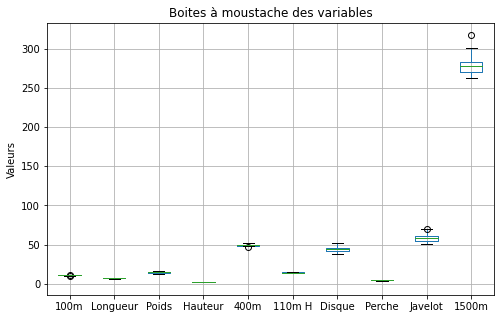

In [ ]:
boxplot = X_scores.boxplot(figsize=(8,5))
boxplot.set_title("Boites à moustache des variables")
boxplot.set_ylabel("Valeurs")

Remarquez que l'analyse de ce boxplot est difficile. Cela est dû au fait que la nature des variables est différente, dans certains cas nous mesurons une distance en mètres et dans d'autres cas nous mesurons le temps en secondes. De plus, la magnitude des variables est très différente, dans la variable "100m" nous aurons une valeur numérique et aussi une variance beaucoup plus faible que les valeurs et la variance de la variable "1500m".

## Corrélations

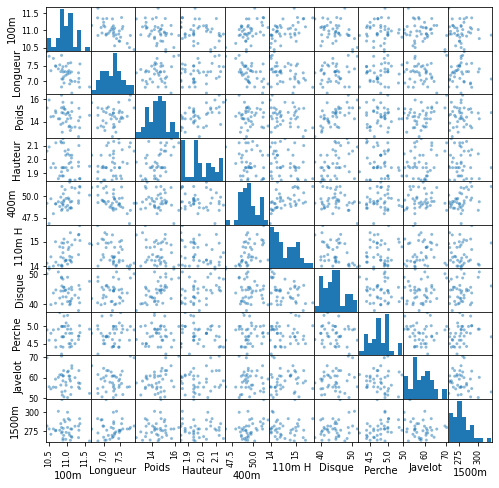

In [ ]:
pd.plotting.scatter_matrix(X_scores, figsize=(8,8)); 

Dans le graphique des variables 2 à 2, nous pouvons visualiser la relation linéaire entre chacune des variables. Comme nous souhaitons quantifier cette relation entre les variables, il est plus utile d'effectuer l'analyse de leur matrice de corrélation.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

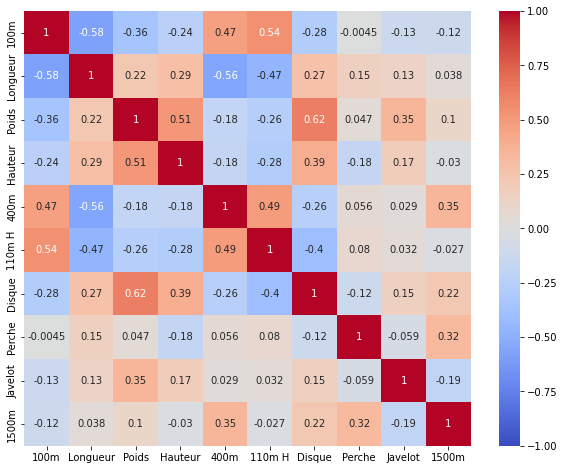

In [ ]:
Cor=pd.DataFrame.corr(X_scores,method='pearson')
plt.figure()
fig_heat, ax_heat = plt.subplots(figsize=(10, 8))
sb.heatmap(Cor, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax_heat)

Dans la matrice de corrélation, nous pouvons identifier la corrélation normalisée entre chacune des variables 2 par 2. Lorsque la corrélation est négative, cela indique que les variables sont inversement proportionnelles, tandis que lorsque la corrélation est positive, cela indique que les variables sont directement proportionnelles. Par exemple, remarquez que la variable "taille" a une corrélation négative dans la course de "400m" de -0,18 et dans la course de "1500m" de -0,03. Cela indique que les personnes de grande taille ont un temps plus court, c'est-à-dire qu'elles sont plus rapides.

# ACP sur les données centrées et réduites

## Centrage-réduction des données

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scores)

## Nouveau boxplot

Text(0, 0.5, 'Valeurs')

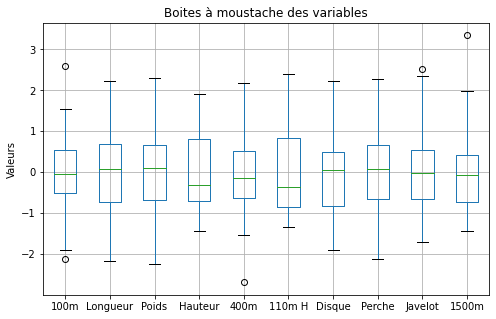

In [ ]:
boxplot_scaled = pd.DataFrame(X_scaled,columns=X_scores.columns).boxplot(figsize=(8,5))
boxplot_scaled.set_title("Boites à moustache des variables")
boxplot_scaled.set_ylabel("Valeurs")

Avant de réaliser l'ACP, nous effectuons la réduction entre les variables et traçons à nouveau votre boxplot. Il est très utile d'analyser la distribution de vos données, remarquez que la variable "100m" présente sa médiane au centre de la moustache, ceci indique que ses données sont symétriques. D'autre part, la variable "110m H" présente sa médiane plus près du bas de la moustache, ce qui indique que les données sont asymétriques positives. En outre, nous pouvons identifier que nous avons 5 valeurs aberrantes, ces valeurs peuvent indiquer des erreurs de mesure, des données incorrectes ou des valeurs inhabituelles qui devraient être examinées de plus près.

## ACP

In [ ]:
acp = PCA()
Xproj = acp.fit_transform(X_scaled)

## Création d'un scatter plot avec les coordonnées factorielles des individus

Text(0.5, 1.0, 'Les individus dans le plan des 2 premiers vecteurs propres')

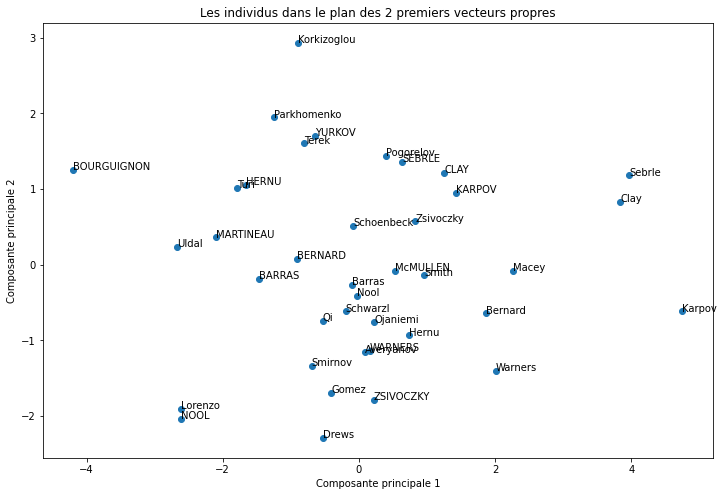

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.scatter(Xproj[:, 0], Xproj[:, 1])

# Ajout des noms des individus dans le plot
for i in range(n):
    ax1.annotate(X_scores.index[i], [Xproj[i, 0], Xproj[i, 1]])

# Ajout des labels et du titre
ax1.set_xlabel('Composante principale 1')
ax1.set_ylabel('Composante principale 2')
ax1.set_title('Les individus dans le plan des 2 premiers vecteurs propres')

Une fois l'ACP effectuée, nous avons tracé les individus en fonction de leur composante principale 1 et 2. Remarquez que dans ce graphique, pour certains individus, nous avons leur nom en double, cela s'est produit parce qu'il a participé aux deux compétitions, comme cela s'est produit avec Karpov. Les noms avec des lettres majuscules sont ceux du concours Decastar, tandis que les noms avec des lettres minuscules sont ceux du JO.


## Calculer les pourcentages de variance

In [ ]:
valeurs_propres = acp.explained_variance_ # Calculer les valeurs propres
variance_totale = pd.Series(valeurs_propres).sum() # Calculer la variance totale
pourcentages = valeurs_propres / variance_totale

Créer le graphique Pareto

Text(0.5, 1.0, 'Pareto')

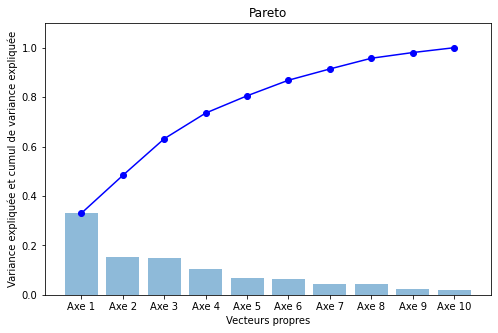

In [ ]:
fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.bar(range(len(pourcentages)), pourcentages, alpha=0.5, align='center')
ax2.plot(range(len(pourcentages)), np.cumsum(pourcentages), '-o', color='b')
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Variance expliquée et cumul de variance expliquée')
ax2.set_xticks(range(len(pourcentages)))
ax2.set_xticklabels(['Axe %d' % (i + 1) for i in range(len(pourcentages))])
ax2.set_xlabel('Vecteurs propres')
ax2.set_title('Pareto')

Avec le diagramme de Pareto, nous pouvons identifier la contribution de chaque composant à la variabilité des données. C'est-à-dire qu'avec la CP1, nous pouvons représenter environ 35% de la dispersion des données. Et pour atteindre 80% de la variabilité des données, nous devrons utiliser les 5 premiers CP.

## Cercle des corrélations

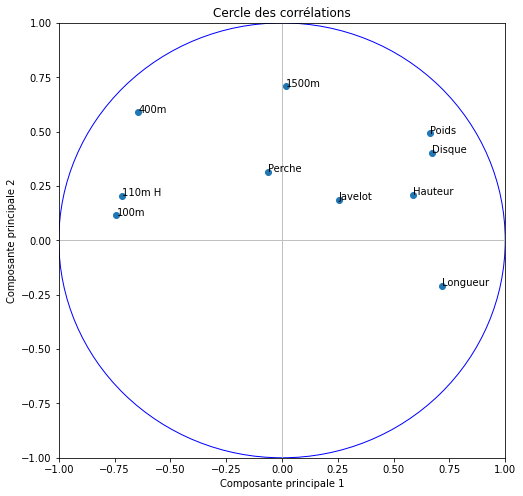

In [ ]:
df_Xproj = pd.DataFrame(Xproj)
df_X = X_scores.reset_index(drop=True)

# Concaténation des cadres de données le long de l'axe horizontal
df_concat = pd.concat([df_Xproj[[0,1]], df_X], axis=1)
m_cor = df_concat.corr()

# Sous-matrice entre la corrélation entre les variables et les composantes principales
corvar = m_cor.iloc[2:(p-1), 0:2].values
# values pour transformer le dataframe en un tableau

# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# On ajoute les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# On ajoute un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title('Cercle des corrélations')
plt.scatter(corvar[:,0],corvar[:,1])

# affichage des étiquettes (noms des variables)
for j in range(p-3):
  plt.annotate(X_scores.columns[j],(corvar[j,0],corvar[j,1]))

Le cercle de corrélation est utilisé pour représenter visuellement la corrélation entre les variables originales et leurs composantes principales. Grâce à lui, nous pouvons donner une signification aux composantes principales. Dans ce cas, CP1 a une forte influence positive sur les variables "Poids", "Disque" et "Longueur", alors qu'elle a une forte influence négative sur les variables "100m", "110m H" et "400m". CP2 a une forte influence positive sur les variables "1500m", "100m" et "Poids", alors qu'il présente une petite influence négative sur la variable "Longueur". Dans le cas idéal, nous aimerions que les variables soient proches des extrémités du circuit, ce qui indiquerait qu'elles contribuent fortement aux composantes, dans ce cas, nous avons quelques variables proches du centre du circuit comme "Perche" qui n'a pas une forte contribution à aucune des composantes.

En regardant la figure "Les individus dans le plan des 2 premiers vecteurs propres", nous pouvons effectuer l'analyse pour chacun des athlètes. A titre d'exemple, analysons "Karpov", il a une valeur élevée pour CP1, ce qui indique qu'il a eu des résultats numériquement élevés pour les variables "Poids", "Disque" et "Longueur" et plus faibles pour "100m", "110m H" et "400m". En ce qui concerne CP2, "Karpov" était très proche de zéro, ce qui indique qu'il avait des valeurs dans "1500m", "400m" et "Poids" qui ont été annulées par le résultat dans "Longueur".

Dans cette ACP, nous avons réduit les données de 10 variables à seulement 5 variables, préservant ainsi 80% de la variance des données. Nous avons effectué la réduction des données avant de réaliser l'ACP en raison de la nature différente des données et avons interprété le résultat à l'aide du diagramme de Pareto et du cercle de corrélation.

## Inertie totale

Méthode explained_variance_

In [ ]:
inertie_totale1 = acp.explained_variance_.sum()
inertie_totale1

10.263157894736839

Somme des variances des variables 

In [ ]:
inertie_totale2 = pd.DataFrame(X_scaled).var().sum()
inertie_totale2

10.263157894736846

Nombre de variables * variance moyenne

In [ ]:
inertie_totale3 = pd.DataFrame(X_scaled).shape[1] * pd.DataFrame(X_scaled).var().mean()
inertie_totale3

10.263157894736846

Méthode trace()

In [ ]:
inertie_totale4 = np.trace(pd.DataFrame(X_scaled).cov().values)
inertie_totale4

10.263157894736842

L'inertie est une métrique qui est directement proportionnelle à la distance entre les points et le centre gravitationnel, de ce fait une grande inertie implique une grande variance des données, alors qu'une petite variance implique une petite variance des données. Dans ce cas, nous calculons l'inertie de 4 manières différentes et obtenons le même résultat (10,26), validant ainsi les 4 méthodes de calcul.

## Cercle avec Classement et Points

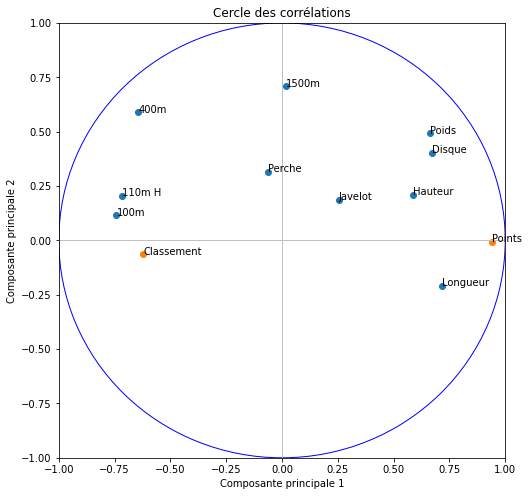

In [ ]:
X1 = X[["Classement","Points"]]
df_X1 = X1.reset_index(drop=True)

# Concaténation des cadres de données le long de l'axe horizontal
df_concat1 = pd.concat([df_Xproj[[0,1]], df_X1], axis=1)
m_cor1 = df_concat1.corr()

# Sous-matrice entre la corrélation entre les variables et les composantes principales
corvar1 = m_cor1.iloc[2:4, 0:2].values
# values pour transformer le dataframe en un tableau

# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# On ajoute les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# On ajoute un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title('Cercle des corrélations')
plt.scatter(corvar[:,0],corvar[:,1])

# affichage des étiquettes (noms des variables)
for j in range(p-3):
  plt.annotate(X_scores.columns[j],(corvar[j,0],corvar[j,1]))

# On ajoute les variables Classement et Points
plt.scatter(corvar1[:,0],corvar1[:,1])

# affichage des étiquettes (noms des variables)
for j in range(2):
  plt.annotate(X1.columns[j],(corvar1[j,0],corvar1[j,1]))

Remarquez que les variables ACP ne présentent pas de corrélation entre elles, mais cela ne se produit pas avec les deux variables "Classement" et "Points" que nous venons d'ajouter. En fait, nous savons que le "Classement" est inversement proportionnel au nombre de "Points", puisque celui qui a obtenu le plus de points a obtenu la première place. Notez également que les "Points" ont une forte contribution positive dans CP1 tandis que le "Classement" a une faible contribution négative dans CP1. Enfin, les "Points" et le "Classement" n'ont aucune influence sur CP2.

## Création d'un scatter plot avec les coordonnées factorielles des individus avec des coleurs différentes

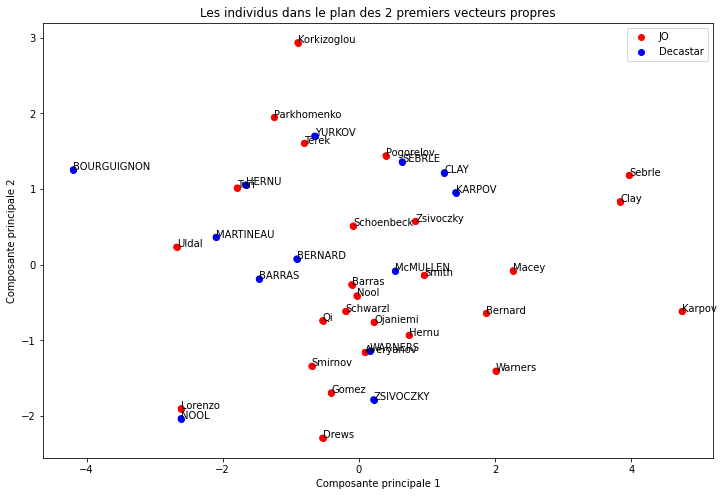

In [ ]:
coleurs_dict = {'JO': 'r', 'Decastar': 'b'}
coleurs = [coleurs_dict[c] for c in X['Competition']]

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.scatter(Xproj[:, 0], Xproj[:, 1], c=coleurs)

sc1 = ax1.scatter(Xproj[X['Competition'] == 'JO', 0], Xproj[X['Competition'] == 'JO', 1], c='r', label='JO')
sc2 = ax1.scatter(Xproj[X['Competition'] == 'Decastar', 0], Xproj[X['Competition'] == 'Decastar', 1], c='b', label='Decastar')

# Ajout des noms des individus dans le plot
for i in range(n):
    ax1.annotate(X_scores.index[i], [Xproj[i, 0], Xproj[i, 1]])

# Ajout des labels et du titre
ax1.set_xlabel('Composante principale 1')
ax1.set_ylabel('Composante principale 2')
ax1.set_title('Les individus dans le plan des 2 premiers vecteurs propres')
ax1.legend(handles=[sc1, sc2])

Les athlètes étant répartis en fonction de la compétition à laquelle ils ont participé, il n'est pas trivial d'effectuer une analyse valable pour l'ensemble des données. Pour cette raison, nous pouvons effectuer une analyse spécifique en fonction de la performance de Karpov. Il a eu une variation plus significative dans CP1, pour comprendre pourquoi nous devons analyser ses résultats dans les variables les plus significatives de CP1, qui sont "Poids", "Disque", "Longueur", "100m", "110m H" et "400m". On remarque que pour les variables présentant une relation positive, la performance de Karpov était numériquement plus élevée dans la compétition JO, par contre, pour les variables présentant une relation négative, la performance était numériquement plus faible dans la compétition JO. Ceci est dû au fait que les courses "100m", "110m H" et "400m" sont mesurées en temps, c'est-à-dire que plus le temps est petit, meilleure est la performance. Finalement, nous pouvons conclure que la performance de Karpov a été meilleure dans la compétition JO par rapport à celle de Decastar.

Une fois cette analyse effectuée, nous avons remarqué que les performances des athlètes étaient meilleures dans le concours JO par rapport au Décastar. Ceci est visible chez l'athlète Clay et Sabrie, qui étaient plus à droite dans le concours JO par rapport au Décastar.

## Centres de gravité

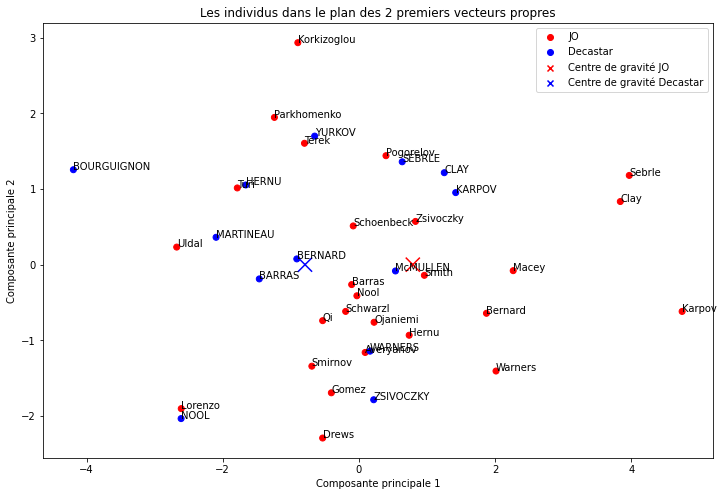

In [ ]:
# Calculer les moyennes des scores pour chaque compétition
JO_mean = pd.DataFrame(X_scaled).loc[X['Competition'].reset_index(drop=True) == 'JO'].mean()
Decastar_mean = pd.DataFrame(X_scaled).loc[X['Competition'].reset_index(drop=True) == 'Decastar'].mean()

# Concaténer les deux moyennes en une seule dataframe
means = pd.concat([JO_mean, Decastar_mean], axis=1)

# Projeter les centres de gravité dans l'espace des composantes principales
center_of_gravity = acp.fit_transform(means.T)

# Ajouter les centres de gravité au plot
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.scatter(center_of_gravity[:, 0], center_of_gravity[:, 1], c=['r', 'b'], marker='x', s=200)
ax1.scatter(Xproj[:, 0], Xproj[:, 1], c=coleurs)
handles = [sc1, sc2, ax1.scatter([], [], c='r', marker='x'), ax1.scatter([], [], c='b', marker='x')]
labels = ['JO', 'Decastar', 'Centre de gravité JO', 'Centre de gravité Decastar']

# Ajout des noms des individus dans le plot
for i in range(n):
    ax1.annotate(X_scores.index[i], [Xproj[i, 0], Xproj[i, 1]])

# Ajout des labels et du titre
ax1.set_xlabel('Composante principale 1')
ax1.set_ylabel('Composante principale 2')
ax1.set_title('Les individus dans le plan des 2 premiers vecteurs propres')
ax1.legend(handles=handles, labels=labels)

Une fois le centre de gravité calculé, nous constatons qu'ils ont presque la même valeur en CP2, la différence se situant en CP1. Sur cette base, nous pouvons arriver à la même conclusion que celle expliquée précédemment. Comme le CP1 est fortement influencé par la performance des athlètes, comme on peut le voir dans la variable "Points", cela indique qu'en moyenne la performance des athlètes était meilleure dans la compétition JO, que le centre de gravité est plus à droite du centre de gravité du Decastar.